In [ ]:
from keras.datasets import mnist

training_set, testing_set=mnist.load_data()
x_train, y_train=training_set
x_test, y_test=testing_set

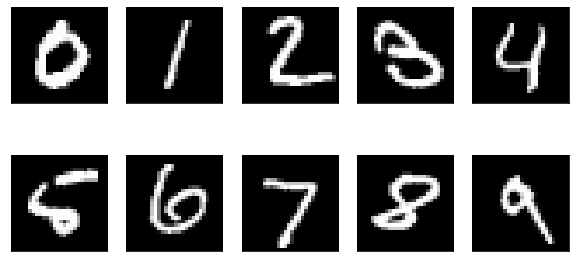

In [ ]:
from matplotlib import pyplot as plt
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10))=plt.subplots(2, 5, figsize=(10,5))

for idx, ax in enumerate([ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]):
  for i in range(1000):
    if y_test[i]==idx:
      ax.imshow(x_test[i], cmap='gray')
      ax.grid(False)
      ax.set_xticks([])
      ax.set_yticks([])
      break

plt.tight_layout
plt.show()

subplots

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()
hidden_layer_size=1
model.add(Dense(units=hidden_layer_size, input_shape=(784, ), activation='relu'))

model.add(Dense(units=784, activation='sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1)                 785       
                                                                 
 dense_15 (Dense)            (None, 784)               1568      
                                                                 
Total params: 2,353
Trainable params: 2,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def create_basic_autoencoder(hidden_layer_size):
  model=Sequential()
  model.add(Dense(units=hidden_layer_size, input_shape=(784,), activation='relu'))
  model.add(Dense(units=784, activation='sigmoid'))
  return model


In [ ]:
x_train_reshape=x_train.reshape((x_train.shape[0],
                                 x_train.shape[1]*x_train.shape[2]))
x_test_reshape=x_test.reshape((x_test.shape[0],
                               x_test.shape[1]*x_test.shape[2]))

In [ ]:
x_train_reshape=x_train.reshape((x_train.shape[0],
                                 x_train.shape[1]*x_train.shape[2]))
x_test_reshape=x_test.reshape((x_test.shape[0],
                               x_test.shape[1]*x_test.shape[2]))

x_train_reshape=x_train_reshape/255.
x_test_reshape=x_test_reshape/255.

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train_reshape, x_train_reshape, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0757
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0653
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0641
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0635
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0632
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0629
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0625
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0620
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0616
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0613


In [ ]:
output=model.predict(x_test_reshape)

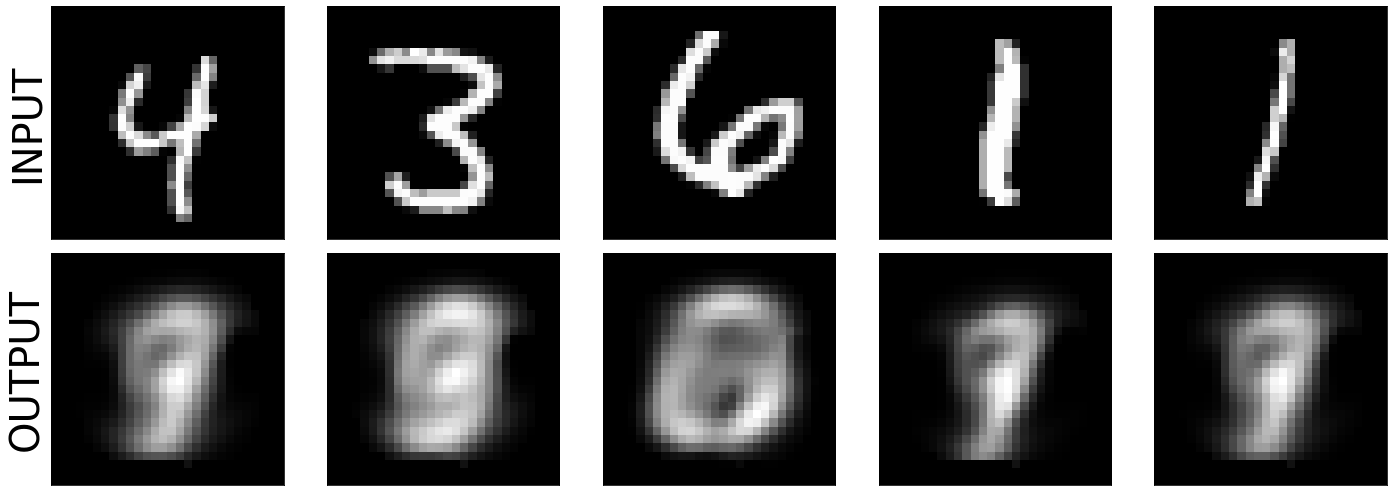

In [ ]:
import random

fig, ((ax1, ax2, ax3, ax4, ax5),
      (ax6, ax7, ax8, ax9, ax10))=plt.subplots(2, 5, figsize=(20,7))

randomly_selected_imgs=random.sample(range(output.shape[0]), 5)

for i, ax in enumerate([ax1, ax2, ax3, ax4, ax5]):
  ax.imshow(x_test[randomly_selected_imgs[i]], cmap='gray')
  if i==0:
    ax.set_ylabel("INPUT", size=40)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

for i, ax in enumerate([ax6, ax7, ax8, ax9, ax10]):
  ax.imshow(output[randomly_selected_imgs[i]].reshape(28, 28), cmap='gray')
  if i==0:
    ax.set_ylabel("OUTPUT", size=40)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

plt.tight_layout()
plt.show()

In [ ]:
hiddenLayerSize_2_model=create_basic_autoencoder(hidden_layer_size=2)
hiddenLayerSize_4_model=create_basic_autoencoder(hidden_layer_size=4)
hiddenLayerSize_8_model=create_basic_autoencoder(hidden_layer_size=8)
hiddenLayerSize_16_model=create_basic_autoencoder(hidden_layer_size=16)
hiddenLayerSize_32_model=create_basic_autoencoder(hidden_layer_size=32)

In [ ]:
hiddenLayerSize_2_model.compile(optimizer='adam', loss='mean_squared_error')
hiddenLayerSize_2_model.fit(x_train_reshape, x_train_reshape, epochs=10, verbose=0)

hiddenLayerSize_4_model.compile(optimizer='adam', loss='mean_squared_error')
hiddenLayerSize_4_model.fit(x_train_reshape, x_train_reshape, epochs=10, verbose=0)

hiddenLayerSize_8_model.compile(optimizer='adam', loss='mean_squared_error')
hiddenLayerSize_8_model.fit(x_train_reshape, x_train_reshape, epochs=10, verbose=0)

hiddenLayerSize_16_model.compile(optimizer='adam', loss='mean_squared_error')
hiddenLayerSize_16_model.fit(x_train_reshape, x_train_reshape, epochs=10, verbose=0)

hiddenLayerSize_32_model.compile(optimizer='adam', loss='mean_squared_error')
hiddenLayerSize_32_model.fit(x_train_reshape, x_train_reshape, epochs=10, verbose=0)

In [ ]:
output_2_model=hiddenLayerSize_2_model.predict(x_test_reshape)
output_4_model=hiddenLayerSize_4_model.predict(x_test_reshape)
output_8_model=hiddenLayerSize_8_model.predict(x_test_reshape)
output_16_model=hiddenLayerSize_16_model.predict(x_test_reshape)
output_32_model=hiddenLayerSize_32_model.predict(x_test_reshape)

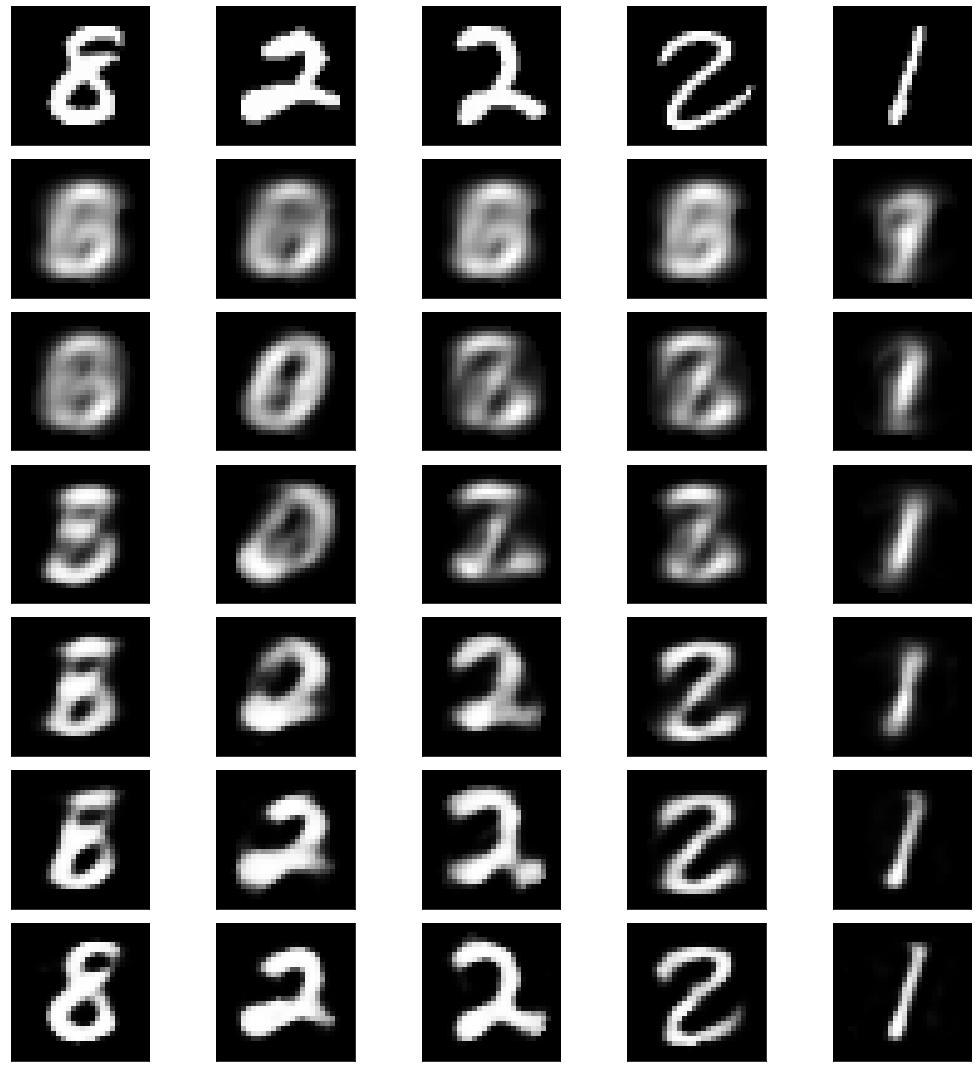

In [ ]:
fig, axes=plt.subplots(7, 5, figsize=(15,15))

randomly_selected_imgs=random.sample(range(output.shape[0]),5)
outputs=[x_test, output, output_2_model, output_4_model, output_8_model, output_16_model, output_32_model]

for row_num, row in enumerate(axes):
  for col_num, ax in enumerate(row):
    ax.imshow(outputs[row_num][randomly_selected_imgs[col_num]].reshape(28,28), cmap='gray')
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

x_train_noisy=x_train_reshape+np.random.normal(0, 0.5, size=x_train_reshape.shape)
x_test_noisy=x_test_reshape+np.random.normal(0, 0.5, size=x_test_reshape.shape)

x_train_noisy=np.clip(x_train_noisy, a_min=0, a_max=1)
x_test_noisy=np.clip(x_test_noisy, a_min=0, a_max=1)

In [ ]:
basic_denoise_autoencoder=create_basic_autoencoder(hidden_layer_size=16)

basic_denoise_autoencoder.compile(optimizer='adam', loss='mean_squared_error')
basic_denoise_autoencoder.fit(x_train_noisy, x_train_reshape, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0457
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0304
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0293
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0290
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0288
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0287
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0286
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0285
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0284
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0283


In [ ]:
output=basic_denoise_autoencoder.predict(x_test_noisy)

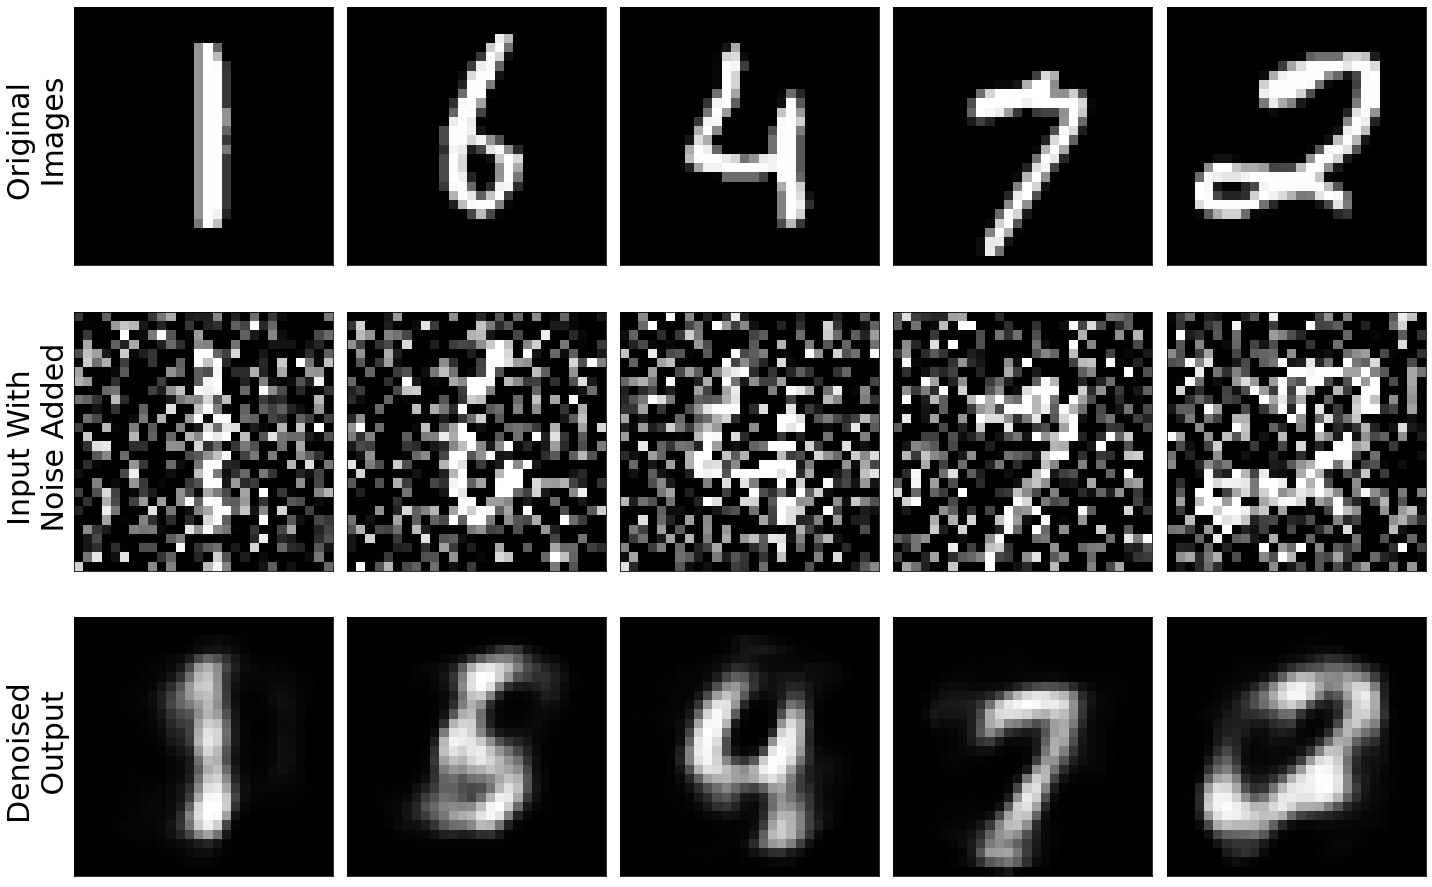

In [ ]:
fig, ((ax1, ax2, ax3, ax4, ax5),
      (ax6, ax7, ax8, ax9, ax10), (ax11, ax12, ax13, ax14, ax15))=plt.subplots(3, 5, figsize=(20,13))

randomly_selected_imgs=random.sample(range(output.shape[0]), 5)

for i, ax in enumerate([ax1, ax2, ax3, ax4, ax5]):
  ax.imshow(x_test_reshape[randomly_selected_imgs[i]].reshape(28,28), cmap='gray')
  if i==0:
    ax.set_ylabel("Original \n Images", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

for i, ax in enumerate([ax6, ax7, ax8, ax9, ax10]):
  ax.imshow(x_test_noisy[randomly_selected_imgs[i]].reshape(28, 28), cmap='gray')
  if i==0:
    ax.set_ylabel("Input With \n Noise Added", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

for i, ax in enumerate([ax11, ax12, ax13, ax14, ax15]):
  ax.imshow(output[randomly_selected_imgs[i]].reshape(28, 28), cmap='gray')
  if i==0:
    ax.set_ylabel("Denoised \n Output", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

plt.tight_layout()
plt.show()

In [ ]:
conv_autoencoder=Sequential()

from keras.layers import Conv2D

conv_autoencoder.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same', input_shape=(28, 28, 1)))
conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))

conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))

conv_autoencoder.add(Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same'))

conv_autoencoder.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 8)         1160      
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 8)         584       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        1168      
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 1)         145       
                                                                 
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [ ]:
conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
conv_autoencoder.fit(x_train_noisy.reshape(60000, 28, 28, 1),
                     x_train_reshape.reshape(60000, 28, 28, 1),
                     epochs=10)

Epoch 1/10
1875/1875 [==============================] - 117s 62ms/step - loss: 0.1223
Epoch 2/10
1875/1875 [==============================] - 116s 62ms/step - loss: 0.1025
Epoch 3/10
1875/1875 [==============================] - 116s 62ms/step - loss: 0.1007
Epoch 4/10
1875/1875 [==============================] - 116s 62ms/step - loss: 0.0996
Epoch 5/10
1875/1875 [==============================] - 116s 62ms/step - loss: 0.0991
Epoch 6/10
1875/1875 [==============================] - 117s 62ms/step - loss: 0.0985
Epoch 7/10
1875/1875 [==============================] - 117s 62ms/step - loss: 0.0982
Epoch 8/10
1875/1875 [==============================] - 117s 63ms/step - loss: 0.0979
Epoch 9/10
1875/1875 [==============================] - 119s 63ms/step - loss: 0.0976
Epoch 10/10
1875/1875 [==============================] - 119s 63ms/step - loss: 0.0974


In [ ]:
output=conv_autoencoder.predict(x_test_noisy.reshape(10000,28,28,1))

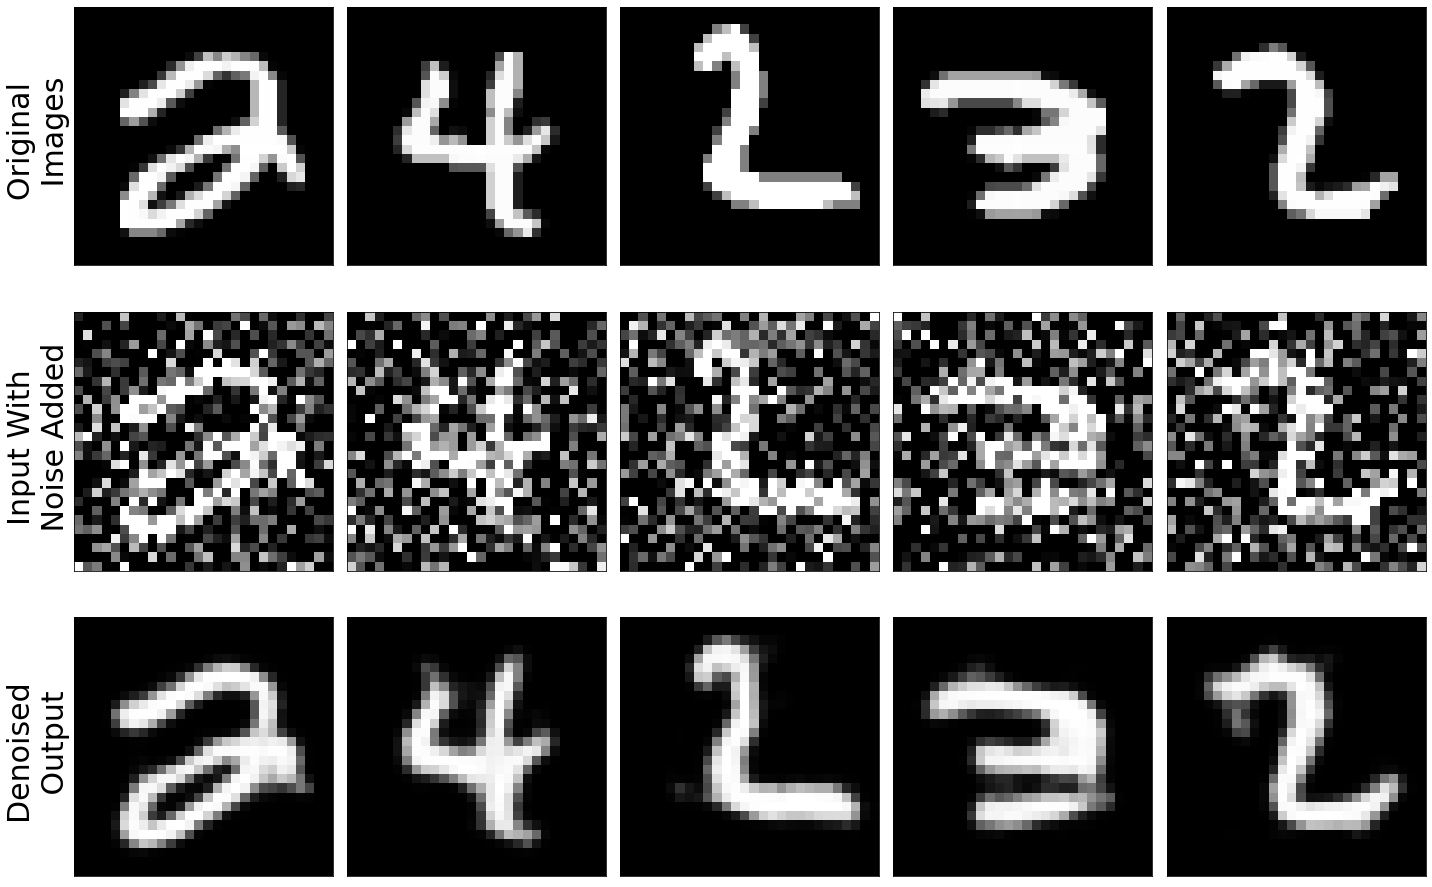

In [ ]:
fig, ((ax1, ax2, ax3, ax4, ax5),
      (ax6, ax7, ax8, ax9, ax10), (ax11, ax12, ax13, ax14, ax15))=plt.subplots(3, 5, figsize=(20,13))

randomly_selected_imgs=random.sample(range(output.shape[0]), 5)

for i, ax in enumerate([ax1, ax2, ax3, ax4, ax5]):
  ax.imshow(x_test_reshape[randomly_selected_imgs[i]].reshape(28,28), cmap='gray')
  if i==0:
    ax.set_ylabel("Original \n Images", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

for i, ax in enumerate([ax6, ax7, ax8, ax9, ax10]):
  ax.imshow(x_test_noisy[randomly_selected_imgs[i]].reshape(28, 28), cmap='gray')
  if i==0:
    ax.set_ylabel("Input With \n Noise Added", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

for i, ax in enumerate([ax11, ax12, ax13, ax14, ax15]):
  ax.imshow(output[randomly_selected_imgs[i]].reshape(28, 28), cmap='gray')
  if i==0:
    ax.set_ylabel("Denoised \n Output", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

plt.tight_layout()
plt.show()

In [ ]:
noisy_imgs_path='Noisy_Document/noisy/'
clean_imgs_path='Noisy_Document/clean/'

In [ ]:
import os
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

x_train_noisy=[]

for file in sorted(os.listdir(noisy_imgs_path)):
  img=load_img(noisy_imgs_path+file, color_mode='grayscale', target_size=(420,540))
  img=img_to_array(img).astype('float32')/255.0
  x_train_noisy.append(img)

x_train_noisy=np.array(x_train_noisy)
print(x_train_noisy.shape)

(216, 420, 540, 1)


In [ ]:
x_train_clean=[]

for file in sorted(os.listdir(clean_imgs_path)):
  img=load_img(clean_imgs_path+file, color_mode='grayscale', target_size=(420,540))
  img=img_to_array(img).astype('float32')/255.0
  x_train_clean.append(img)

x_train_clean=np.array(x_train_clean)
print(x_train_noisy.shape)

(216, 420, 540, 1)


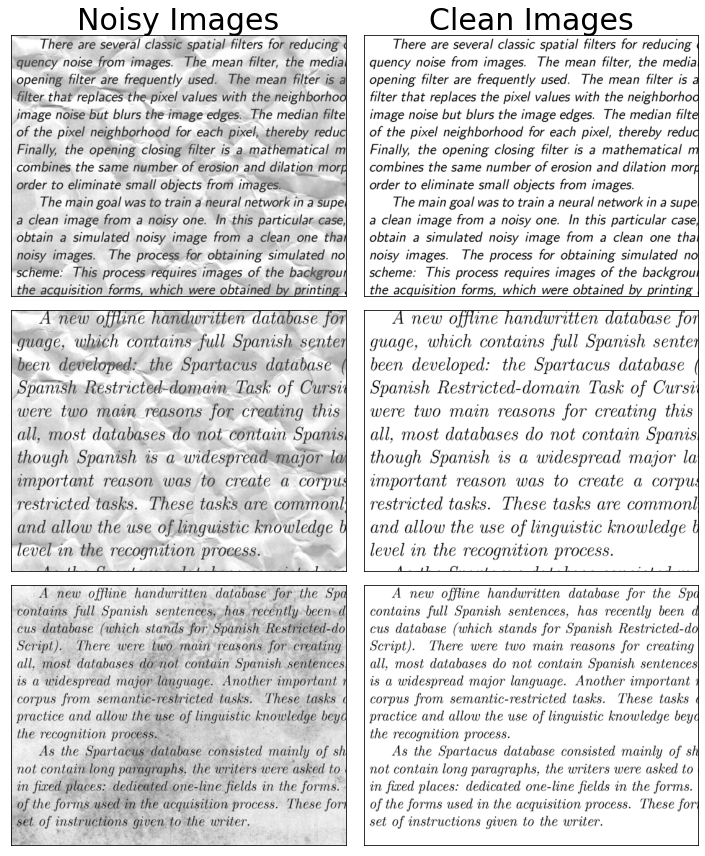

In [ ]:
import random
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6))=plt.subplots(3,2,figsize=(10, 12))
randomly_selected_imgs=random.sample(range(x_train_noisy.shape[0]),3)

for i, ax in enumerate([ax1, ax3, ax5]):
  ax.imshow(x_train_noisy[i].reshape(420, 540), cmap='gray')
  if i==0:
    ax.set_title("Noisy Images", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

for i, ax in enumerate([ax2, ax4, ax6]):
  ax.imshow(x_train_clean[i].reshape(420, 540), cmap='gray')
  if i==0:
    ax.set_title("Clean Images", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

plt.tight_layout()
plt.show()

In [ ]:
x_test_noisy=x_train_noisy[0:20,]
x_train_noisy=x_train_noisy[21:,]

x_test_clean=x_train_clean[0:20,]
x_train_clean=x_train_clean[21:]

In [ ]:
basic_conv_autoencoder=Sequential()

basic_conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3),
                                  activation='relu', padding='same',
                                  input_shape=(420,540,1)))
basic_conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3),
                                  activation='relu', padding='same'))
basic_conv_autoencoder.add(Conv2D(filters=1, kernel_size=(3,3),
                                  activation='sigmoid', padding='same'))
basic_conv_autoencoder.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 420, 540, 8)       80        
                                                                 
 conv2d_6 (Conv2D)           (None, 420, 540, 8)       584       
                                                                 
 conv2d_7 (Conv2D)           (None, 420, 540, 1)       73        
                                                                 
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
basic_conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
basic_conv_autoencoder.fit(x_train_noisy, x_train_clean, epochs=10)

Epoch 1/10
7/7 [==============================] - 40s 6s/step - loss: 0.2357
Epoch 2/10
7/7 [==============================] - 39s 5s/step - loss: 0.2220
Epoch 3/10
7/7 [==============================] - 38s 5s/step - loss: 0.2091
Epoch 4/10
7/7 [==============================] - 38s 5s/step - loss: 0.1969
Epoch 5/10
7/7 [==============================] - 38s 5s/step - loss: 0.1851
Epoch 6/10
7/7 [==============================] - 37s 5s/step - loss: 0.1739
Epoch 7/10
7/7 [==============================] - 37s 5s/step - loss: 0.1636
Epoch 8/10
7/7 [==============================] - 37s 5s/step - loss: 0.1543
Epoch 9/10
7/7 [==============================] - 37s 5s/step - loss: 0.1462
Epoch 10/10
7/7 [==============================] - 37s 5s/step - loss: 0.1386


In [ ]:
output=basic_conv_autoencoder.predict(x_test_noisy)

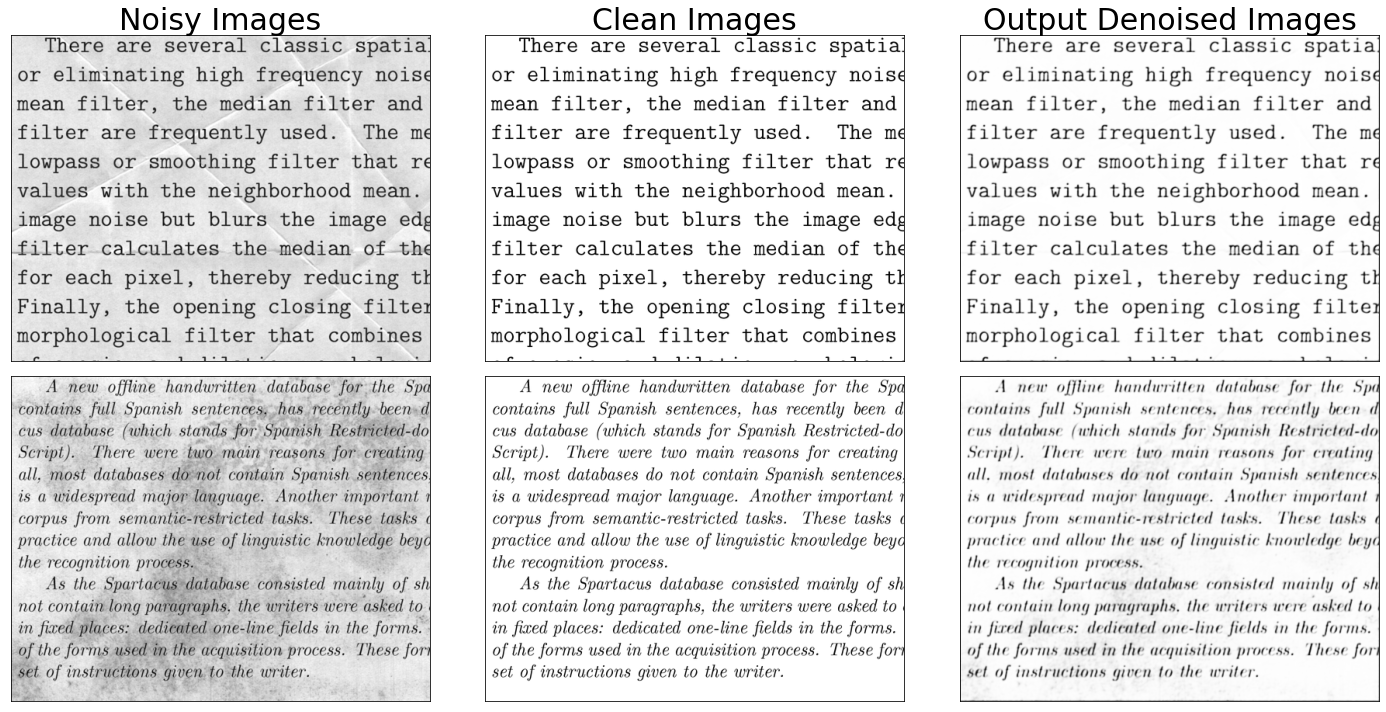

In [ ]:
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6))=plt.subplots(2, 3, figsize=(20,10))
randomly_selected_imgs=random.sample(range(x_test_noisy.shape[0]),2)

for i, ax in enumerate([ax1, ax4]):
  idx=randomly_selected_imgs[i]
  ax.imshow(x_test_noisy[idx].reshape(420,540), cmap='gray')
  if i==0:
    ax.set_title("Noisy Images", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

for i, ax in enumerate([ax2, ax5]):
  idx=randomly_selected_imgs[i]
  ax.imshow(x_test_clean[idx].reshape(420, 540), cmap='gray')
  if i==0:
    ax.set_title("Clean Images", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

for i, ax in enumerate([ax3, ax6]):
  idx=randomly_selected_imgs[i]
  ax.imshow(output[idx].reshape(420,540), cmap='gray')
  if i==0:
    ax.set_title("Output Denoised Images", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

plt.tight_layout()
plt.show()

In [ ]:
conv_autoencoder=Sequential()

conv_autoencoder.add(Conv2D(filters=32, kernel_size=(3,3), 
                            input_shape=(420, 540, 1), activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))

conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))

conv_autoencoder.add(Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same'))

conv_autoencoder.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 420, 540, 32)      320       
                                                                 
 conv2d_16 (Conv2D)          (None, 420, 540, 16)      4624      
                                                                 
 conv2d_17 (Conv2D)          (None, 420, 540, 8)       1160      
                                                                 
 conv2d_18 (Conv2D)          (None, 420, 540, 8)       584       
                                                                 
 conv2d_19 (Conv2D)          (None, 420, 540, 16)      1168      
                                                                 
 conv2d_20 (Conv2D)          (None, 420, 540, 32)      4640      
                                                                 
 conv2d_21 (Conv2D)          (None, 420, 540, 1)     

In [ ]:
conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
conv_autoencoder.fit(x_train_noisy, x_train_clean, epochs=10)
output=conv_autoencoder.predict(x_test_noisy)

Epoch 1/10
7/7 [==============================] - 219s 30s/step - loss: 0.6786
Epoch 2/10
7/7 [==============================] - 211s 29s/step - loss: 0.5068
Epoch 3/10
7/7 [==============================] - 212s 30s/step - loss: 0.3465
Epoch 4/10
7/7 [==============================] - 214s 30s/step - loss: 0.3137
Epoch 5/10
7/7 [==============================] - 210s 29s/step - loss: 0.3028
Epoch 6/10
7/7 [==============================] - 211s 29s/step - loss: 0.2887
Epoch 7/10
7/7 [==============================] - 212s 30s/step - loss: 0.2621
Epoch 8/10
7/7 [==============================] - 212s 30s/step - loss: 0.2154
Epoch 9/10
7/7 [==============================] - 213s 30s/step - loss: 0.1660
Epoch 10/10
7/7 [==============================] - 212s 29s/step - loss: 0.1411


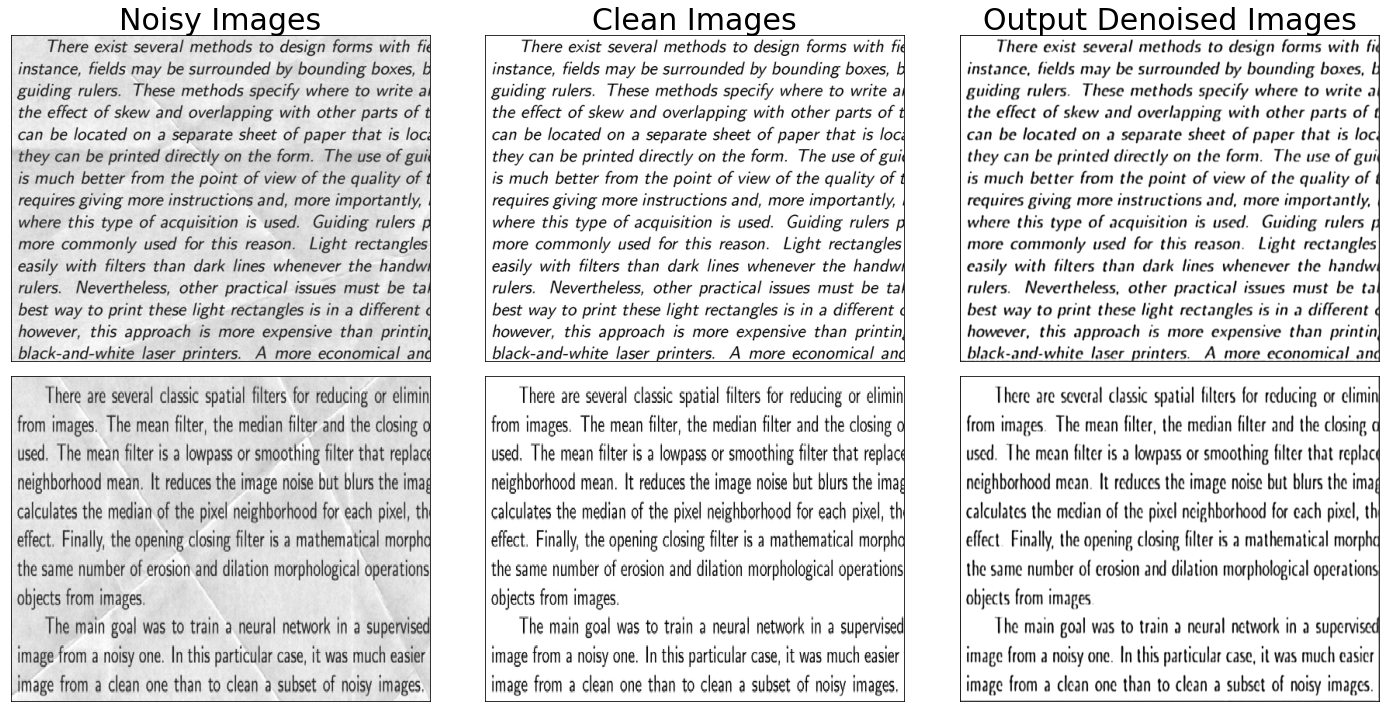

In [ ]:
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6))=plt.subplots(2, 3, figsize=(20,10))
randomly_selected_imgs=random.sample(range(x_test_noisy.shape[0]),2)

for i, ax in enumerate([ax1, ax4]):
  idx=randomly_selected_imgs[i]
  ax.imshow(x_test_noisy[idx].reshape(420,540), cmap='gray')
  if i==0:
    ax.set_title("Noisy Images", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

for i, ax in enumerate([ax2, ax5]):
  idx=randomly_selected_imgs[i]
  ax.imshow(x_test_clean[idx].reshape(420, 540), cmap='gray')
  if i==0:
    ax.set_title("Clean Images", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

for i, ax in enumerate([ax3, ax6]):
  idx=randomly_selected_imgs[i]
  ax.imshow(output[idx].reshape(420,540), cmap='gray')
  if i==0:
    ax.set_title("Output Denoised Images", size=30)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

plt.tight_layout()
plt.show()